In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

In [2]:
#Reading the Csv file
bike_sharing_df = pd.read_csv('BikeSharingData.csv',low_memory=False)

In [3]:
bike_sharing_df.shape

(10886, 12)

In [4]:
bike_sharing_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
bike_sharing_df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [6]:
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
bike_sharing_df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
bike_sharing_df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


In [9]:
for col in bike_sharing_df.columns:
    if(bike_sharing_df[col].nunique() < 5):
        print(col ,'--->', bike_sharing_df[col].unique())

season ---> [1 2 3 4]
holiday ---> [0 1]
workingday ---> [0 1]
weather ---> [1 2 3 4]


In [10]:
bike_sharing_df['Season_Names']=bike_sharing_df['season'].map({1:'autumn',2:'spring',3:'summer',4:'winter'})

In [11]:
bike_sharing_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Season_Names
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,autumn
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,autumn
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,autumn
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,autumn
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,autumn


In [12]:
bike_sharing_df.Season_Names.mode()

0    winter
Name: Season_Names, dtype: object

In [13]:
bike_sharing_df['IsAHoliday']=bike_sharing_df['holiday'].map({0:'No',1:'Yes'})

In [14]:
bike_sharing_df.IsAHoliday.mode()

0    No
Name: IsAHoliday, dtype: object

In [15]:
bike_sharing_df['IsAWorkingday']=bike_sharing_df['workingday'].map({0:'No',1:'Yes'})

In [16]:
bike_sharing_df.IsAWorkingday.mode()

0    Yes
Name: IsAWorkingday, dtype: object

In [17]:
bike_sharing_df['weather_types']=bike_sharing_df['weather'].map({1:'cloudy',2:'rainy',3:'sunny',4:'windy'})

In [18]:
bike_sharing_df.weather_types.mode()

0    cloudy
Name: weather_types, dtype: object

In [19]:
bike_sharing_df.datetime.unique()

array(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
       '2011-01-01 02:00:00', ..., '2012-12-19 21:00:00',
       '2012-12-19 22:00:00', '2012-12-19 23:00:00'], dtype=object)

In [20]:
bike_sharing_df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Season_Names,IsAHoliday,IsAWorkingday,weather_types
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,winter,No,Yes,cloudy
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,winter,No,Yes,cloudy
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,winter,No,Yes,cloudy
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,winter,No,Yes,cloudy
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,winter,No,Yes,cloudy


In [21]:
bike_sharing_df[bike_sharing_df.season == 1].IsAWorkingday.value_counts()

Yes    1828
No      858
Name: IsAWorkingday, dtype: int64

In [22]:
bike_sharing_df[bike_sharing_df.windspeed == bike_sharing_df.windspeed.max()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Season_Names,IsAHoliday,IsAWorkingday,weather_types
2755,2011-07-03 17:00:00,3,0,0,3,32.8,37.12,49,56.9969,181,177,358,summer,No,No,sunny
2756,2011-07-03 18:00:00,3,0,0,3,32.8,37.12,49,56.9969,74,107,181,summer,No,No,sunny


In [23]:
bike_sharing_df[(bike_sharing_df.holiday == 0) & (bike_sharing_df.workingday == 0)]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Season_Names,IsAHoliday,IsAWorkingday,weather_types
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,autumn,No,No,cloudy
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,autumn,No,No,cloudy
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,autumn,No,No,cloudy
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,autumn,No,No,cloudy
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,autumn,No,No,cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10809,2012-12-16 19:00:00,4,0,0,1,14.76,17.425,93,8.9981,10,99,109,winter,No,No,cloudy
10810,2012-12-16 20:00:00,4,0,0,2,15.58,19.695,82,0.0000,14,108,122,winter,No,No,rainy
10811,2012-12-16 21:00:00,4,0,0,2,14.76,18.940,93,0.0000,14,92,106,winter,No,No,rainy
10812,2012-12-16 22:00:00,4,0,0,2,16.40,20.455,82,12.9980,6,83,89,winter,No,No,rainy


In [24]:
bike_sharing_df[(bike_sharing_df.holiday == 1) & (bike_sharing_df.workingday == 1)]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Season_Names,IsAHoliday,IsAWorkingday,weather_types


<AxesSubplot:xlabel='Season_Names', ylabel='casual'>

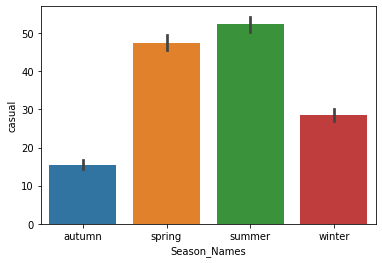

In [25]:
sns.barplot(x='Season_Names',y='casual',data=bike_sharing_df)

<AxesSubplot:xlabel='Season_Names', ylabel='registered'>

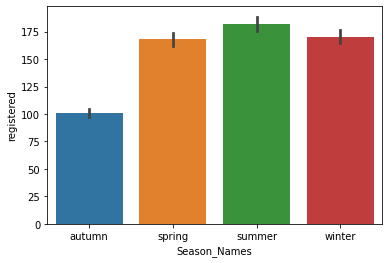

In [26]:
sns.barplot(x='Season_Names',y='registered',data=bike_sharing_df)

<AxesSubplot:xlabel='Season_Names', ylabel='count'>

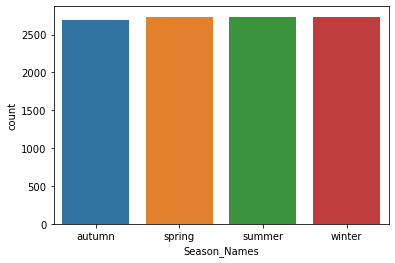

In [27]:
sns.countplot(x='Season_Names',data=bike_sharing_df)

<AxesSubplot:xlabel='weather_types', ylabel='casual'>

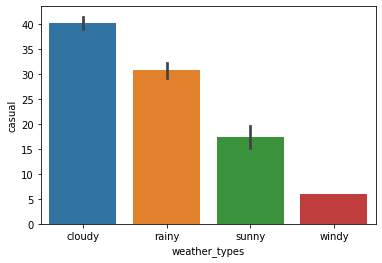

In [28]:
sns.barplot(x='weather_types',y='casual',data=bike_sharing_df)

<AxesSubplot:xlabel='weather_types', ylabel='registered'>

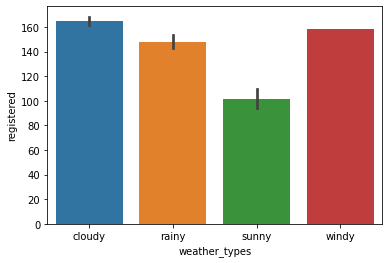

In [29]:
sns.barplot(x='weather_types',y='registered',data=bike_sharing_df)

<AxesSubplot:xlabel='weather_types', ylabel='count'>

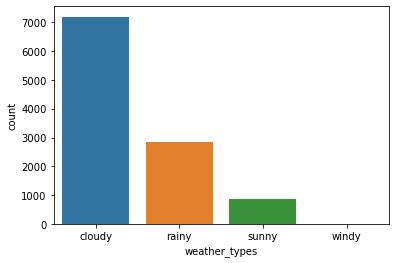

In [30]:
sns.countplot(x='weather_types',data=bike_sharing_df)

In [31]:
bike_sharing_df.groupby('season').get_group(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Season_Names,IsAHoliday,IsAWorkingday,weather_types
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,autumn,No,No,cloudy
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,autumn,No,No,cloudy
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,autumn,No,No,cloudy
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,autumn,No,No,cloudy
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,autumn,No,No,cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6780,2012-03-19 19:00:00,1,0,1,1,25.42,30.305,61,15.0013,86,463,549,autumn,No,Yes,cloudy
6781,2012-03-19 20:00:00,1,0,1,1,24.60,30.305,64,15.0013,34,296,330,autumn,No,Yes,cloudy
6782,2012-03-19 21:00:00,1,0,1,1,24.60,30.305,64,11.0014,33,190,223,autumn,No,Yes,cloudy
6783,2012-03-19 22:00:00,1,0,1,2,22.96,26.515,73,11.0014,17,131,148,autumn,No,Yes,rainy


In [32]:
bike_sharing_df['day'] = pd.to_datetime(bike_sharing_df['datetime']).dt.day
bike_sharing_df['month'] = pd.to_datetime(bike_sharing_df['datetime']).dt.month
bike_sharing_df['year'] = pd.to_datetime(bike_sharing_df['datetime']).dt.year
bike_sharing_df['hour'] = pd.to_datetime(bike_sharing_df['datetime']).dt.hour
bike_sharing_df.drop('datetime', axis=1, inplace=True)

In [33]:
bike_sharing_df.day.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19], dtype=int64)

In [34]:
bike_sharing_df.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [35]:
bike_sharing_df.year.unique()

array([2011, 2012], dtype=int64)

In [36]:
bike_sharing_df.hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [37]:
bike_sharing_df.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Season_Names,IsAHoliday,IsAWorkingday,weather_types,day,month,year,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,autumn,No,No,cloudy,1,1,2011,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,autumn,No,No,cloudy,1,1,2011,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,autumn,No,No,cloudy,1,1,2011,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,autumn,No,No,cloudy,1,1,2011,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,autumn,No,No,cloudy,1,1,2011,4


<AxesSubplot:xlabel='weather_types', ylabel='count'>

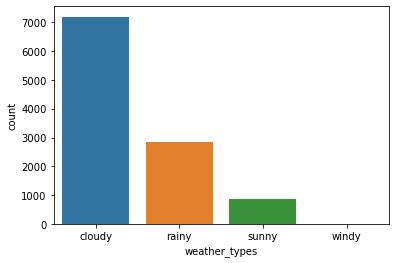

In [38]:
sns.countplot(x=bike_sharing_df.weather_types)

In [39]:
tbl = bike_sharing_df.pivot_table(columns = 'workingday', index = 'hour', values = 'count', aggfunc = 'mean')
tbl = round(tbl)
tbl

workingday,0,1
hour,,
0,94.0,37.0
1,72.0,16.0
2,54.0,8.0
3,26.0,5.0
4,9.0,5.0
5,9.0,25.0
6,20.0,103.0
7,47.0,291.0
8,112.0,480.0


<AxesSubplot:xlabel='hour'>

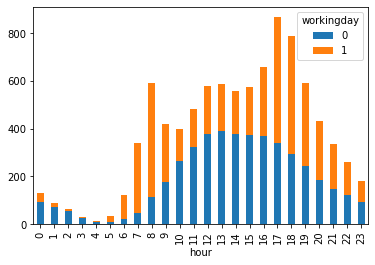

In [40]:
tbl.plot(kind = 'bar', stacked = True)

In [41]:
seasons_tbl = bike_sharing_df.pivot_table(columns = 'Season_Names', index = 'hour', values = 'count', aggfunc = 'mean')
seasons_tbl = round(seasons_tbl)
seasons_tbl

Season_Names,autumn,spring,summer,winter
hour,,,,
0,28.0,58.0,76.0,58.0
1,19.0,36.0,45.0,36.0
2,13.0,23.0,32.0,23.0
3,8.0,12.0,16.0,11.0
4,3.0,7.0,8.0,7.0
5,10.0,20.0,26.0,22.0
6,43.0,83.0,97.0,82.0
7,124.0,232.0,264.0,231.0
8,253.0,390.0,404.0,403.0


<AxesSubplot:ylabel='hour'>

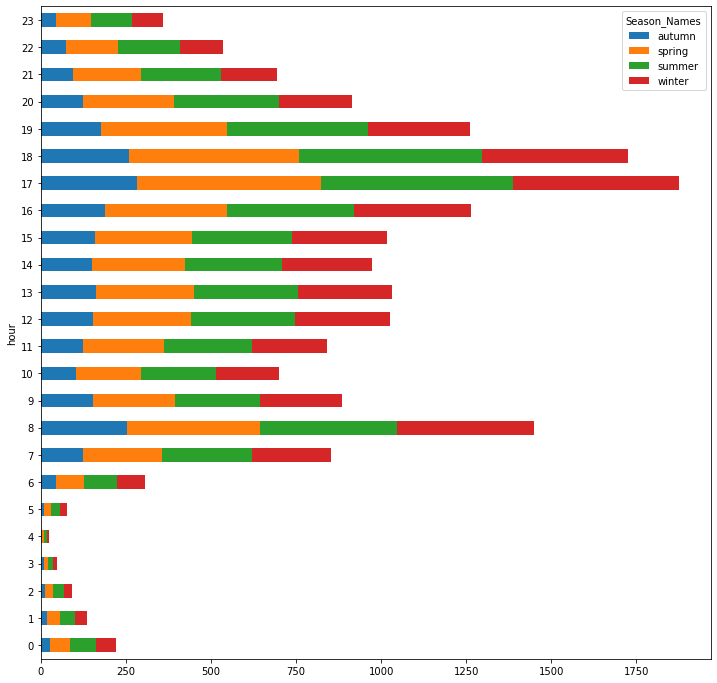

In [42]:
seasons_tbl.plot(kind='barh',stacked=True,figsize=(12,12))

In [43]:
a = bike_sharing_df.pivot_table(columns = 'weather_types', index = 'windspeed', values = 'count', aggfunc = 'mean')
a = round(a)
a

weather_types,cloudy,rainy,sunny,windy
windspeed,,,,
0.0000,165.0,159.0,125.0,NaN
6.0032,153.0,147.0,109.0,164.0
7.0015,173.0,178.0,112.0,NaN
8.9981,190.0,157.0,122.0,NaN
11.0014,218.0,195.0,107.0,NaN
12.9980,212.0,198.0,134.0,NaN
15.0013,234.0,187.0,115.0,NaN
16.9979,243.0,176.0,126.0,NaN
19.0012,234.0,200.0,122.0,NaN


<AxesSubplot:xlabel='windspeed'>

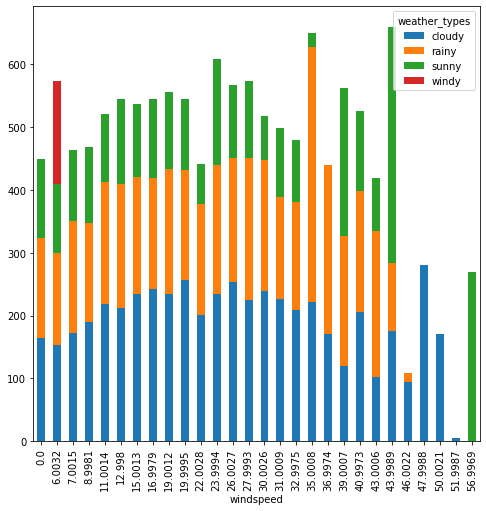

In [44]:
a.plot(kind='bar',stacked=True, figsize=(8,8))

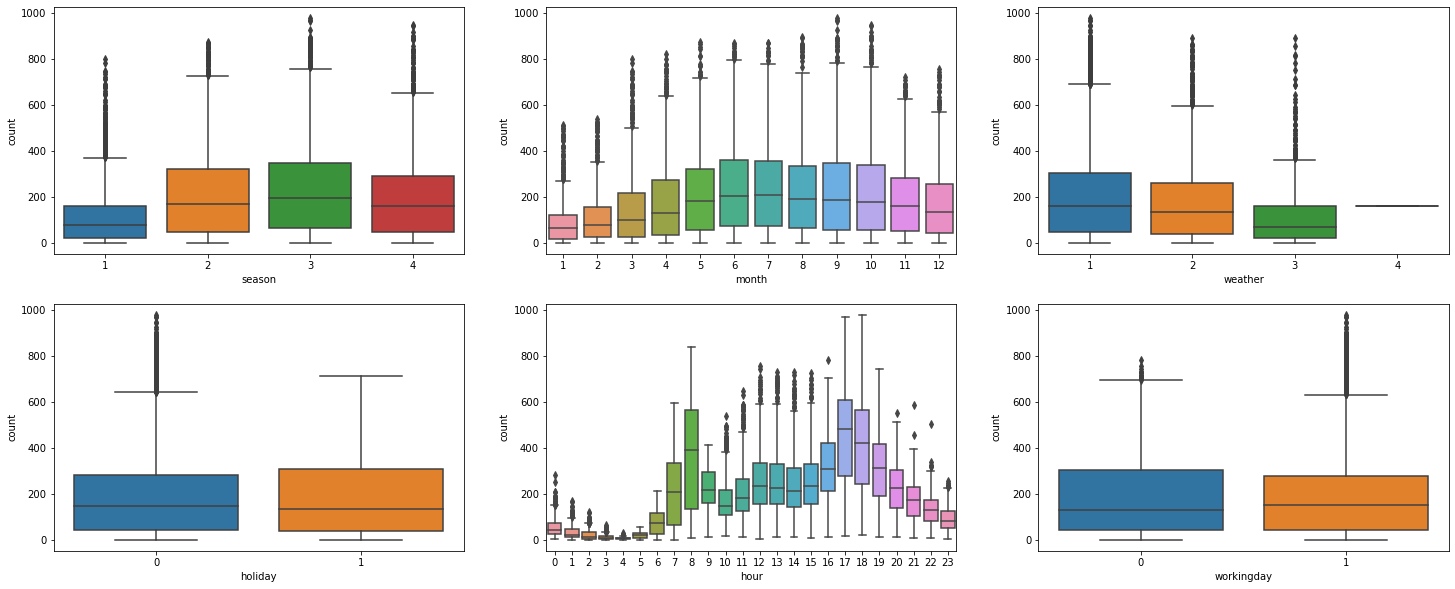

In [45]:
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'count', data = bike_sharing_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'month', y = 'count', data = bike_sharing_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'weather', y = 'count', data = bike_sharing_df)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'count', data = bike_sharing_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'hour', y = 'count', data = bike_sharing_df)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'count', data = bike_sharing_df)
plt.show()

In [46]:
drop_cols = ['casual','registered','season','weather','IsAHoliday', 'IsAWorkingday','day']
bike_sharing_new = bike_sharing_df.drop(drop_cols, axis =1)

In [47]:
bike_sharing_new.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'count', 'Season_Names', 'weather_types', 'month', 'year', 'hour'],
      dtype='object')

In [48]:
bike_sharing_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Season_Names,IsAHoliday,IsAWorkingday,weather_types,day,month,year,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,autumn,No,No,cloudy,1,1,2011,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,autumn,No,No,cloudy,1,1,2011,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,autumn,No,No,cloudy,1,1,2011,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,autumn,No,No,cloudy,1,1,2011,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,autumn,No,No,cloudy,1,1,2011,4


In [49]:
#bike_sharing_new = pd.get_dummies(bike_sharing_new,drop_first=True)
bike_sharing_new = pd.get_dummies(data= bike_sharing_new, columns=["month",'Season_Names','weather_types'], drop_first=True)
#bike_sharing_new = pd.get_dummies(bike_sharing_new['month'],drop_first=True)
bike_sharing_new.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,year,hour,month_2,...,month_9,month_10,month_11,month_12,Season_Names_spring,Season_Names_summer,Season_Names_winter,weather_types_rainy,weather_types_sunny,weather_types_windy
0,0,0,9.84,14.395,81,0.0,16,2011,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,9.02,13.635,80,0.0,40,2011,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,9.02,13.635,80,0.0,32,2011,2,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,9.84,14.395,75,0.0,13,2011,3,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,9.84,14.395,75,0.0,1,2011,4,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

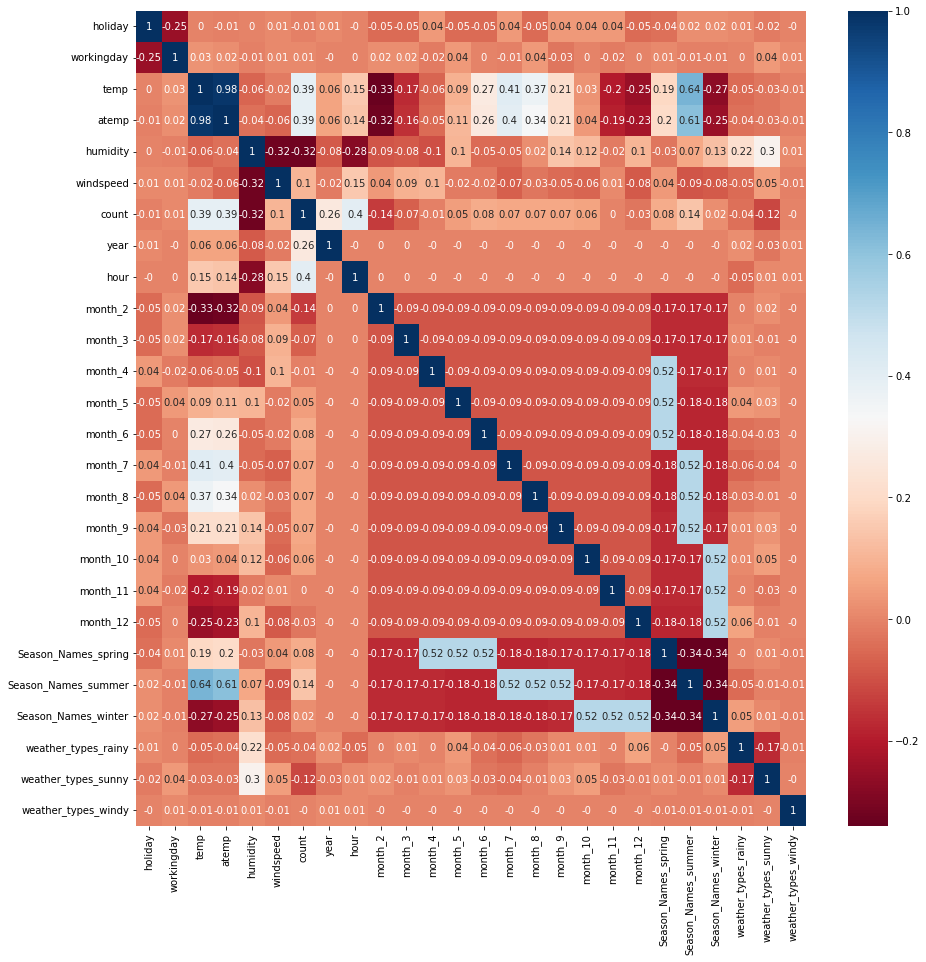

In [50]:
plt.figure(figsize = (15,15))
sns.heatmap(round(bike_sharing_new.corr(),2), annot=True , cmap="RdBu")

In [51]:
from scipy.stats import pearsonr

significant_columns = []
for column in bike_sharing_new.columns:
    if(column != 'count'):
        corr,p = pearsonr(bike_sharing_new['count'], bike_sharing_new[column])
        if(((corr >= 0.2) | (corr <= -0.2))):
            print(column , corr, p)
            significant_columns.append(column)

temp 0.39445364496724916 0.0
atemp 0.3897844366269767 0.0
humidity -0.31737147887659456 2.921541663750899e-253
year 0.26040329737831547 3.242014233187686e-168
hour 0.40060119414684736 0.0


In [52]:
df_train, df_test = train_test_split(bike_sharing_new, train_size = 0.70, test_size = 0.30, random_state = 333)
print(df_train.shape ,  df_test.shape)

(7620, 26) (3266, 26)


### Simple Linear Regression

In [ ]:
10.72767 +1.1589*50

In [ ]:
model4 = smf.ols(formula='count ~ X', data= bike_sharing_df).fit()
model4.summary()

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(X.corr(), annot=True)

In [ ]:
columns = ['holiday', 'workingday','atemp','windspeed','month_2', 'month_3', 'month_4','month_6','Season_Names_spring', 'Season_Names_summer','weather_types_rainy',
           'weather_types_windy','month_8','month_10','month_11','month_12','month_7','weather_types_sunny','count']
X = bike_sharing_new.drop(columns,axis=1)
Y = bike_sharing_new["count"]
lr  = LinearRegression()
buildModel(lr,X,Y)

In [ ]:
X.columns

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(X.corr(), annot=True)

In [ ]:
model5 = smf.ols(formula='count ~ X', data= bike_sharing_df).fit()
model5.summary()

In [ ]:
columns = ['holiday', 'workingday','atemp','windspeed','month_2', 'month_3', 'month_4','month_6','Season_Names_spring', 'Season_Names_summer','weather_types_rainy',
           'weather_types_windy','month_8','month_10','month_11','month_12','month_7','weather_types_sunny','Season_Names_winter','count']
X = bike_sharing_new.drop(columns,axis=1)
Y = bike_sharing_new["count"]
lr  = LinearRegression()
buildModel(lr,X,Y)

In [ ]:
X.columns

In [ ]:
model6 = smf.ols(formula='count ~ X', data= bike_sharing_df).fit()
model6.summary()

In [ ]:
columns = ['temp','atemp','humidity','hour','year']
X = bike_sharing_new[columns]
Y = bike_sharing_new["count"]
lr  = LinearRegression()
buildModel(lr,X,Y)